___
# Titanic: Machine Learning from Disaster

In this project we will be using the famous [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set often used as first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding and implementing Logistic Regression for the classification.


In [1]:
#importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf

cf.go_offline()
%matplotlib inline

In [2]:
titanic_train= pd.read_csv('titanic_train.csv')   #storing the training dataset into variable 'titanic_train'.
titanic_test= pd.read_csv('titanic_test.csv')     #storing the testing dataset into variable 'titanic_test'.

___

## Data Information

We have two sets of datasets in csv format. Both of them having common columns except one data set not having the 'Survived' column. Our goal is to predict that 'Survived' column using Logistic Regression as our machine learning model.      
The data provided in the dataset are:

* PassengerId: Alloted Id to the passenger    
* Pclass: Ticket Class of passenger in which they were travelling
* Name: Name of the passenger
* Sex: Sex of the passenger (male or female)
* Age: Age of the passenger
* SibSp: Number of Siblings/Spouses aboard the Titanic
* Parch: Number of Parents/Children aboard the Titanic
* Ticket: Passenger's ticket number
* Fare: Passenger Fare
* Cabin: Cabin number
* Embarked: Port of Embarktion (C = Cherbourg, Q = Queenstown, S = Southampton)
* Survived: If the passenger survived the disaster (0 = deceased, 1 = survived)

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
titanic_train.info()    #here we can see the training data contains around 891 empty and non-empty entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_test.info()     #here we can see the test data contains around 891 empty and non-empty entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


____________
## Exploratory Data Analysis

**Lets explore the data!**

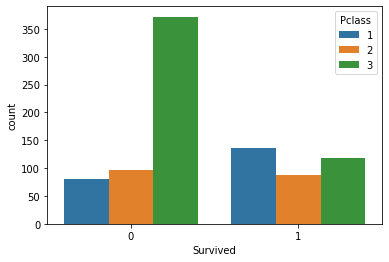

In [7]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_train)

**From the above countplot we can observe that the number of deceased is far higher of the passengers from the 3rd class. Also number of survived is slightly higher of the passengers from the 1st class.**

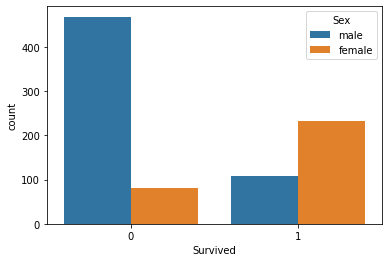

In [8]:
sns.countplot(x='Survived', hue='Sex', data=titanic_train)

**The above graph shows that the number of deceased has far more male than female. Also the number of survived female is higher than the male.**

In [9]:
titanic_train['Fare'].iplot(xTitle='Fare') 

____________
## Feature Engineering

**Now that we have fairly good understanding of the dataset, lets move ahead and condition the data accordingly so that it fits our machine learning model.**

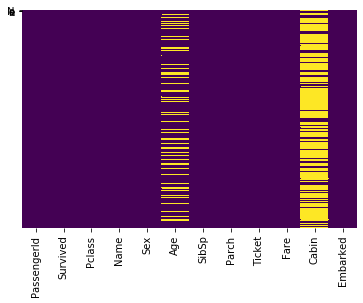

In [10]:
sns.heatmap(titanic_train.isnull(), yticklabels='None', cbar=False, cmap='viridis')

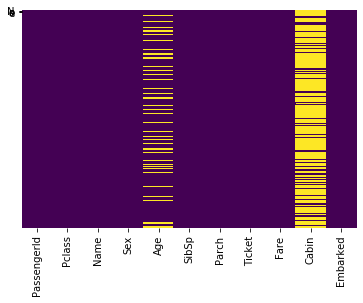

In [11]:
sns.heatmap(titanic_test.isnull(), yticklabels='None', cbar=False, cmap='viridis')

**From above two heatmaps we can see that there are lot of null values in both the datasets and we can't train and implement a machine learning model on dataset having null values. So lets figure out ways to fill them.**

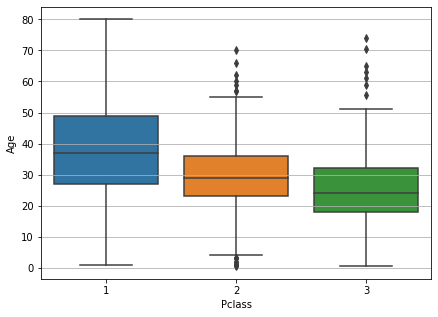

In [12]:
plt.figure(figsize=(7,5))
plt.grid()
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic_train)

**The above boxplot gives us the average age of the people according to the Passenger Class. We can fill in the missing age values according to their Passenger Class by creating a function.**    
Mean Age Values are:
* 1st Class: 37
* 2nd Class: 29
* 3rd class: 24

**We can also understand that the mean age value drops when going from higher class to lower class, which can be interpreted as older you get higher the income is or savings you acquired**

In [13]:
#function for imputing the missing age values 

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    
    else:
        return Age
        

In [14]:
titanic_train['Age'] = titanic_train[['Age','Pclass']].apply(impute_age, axis=1)

In [15]:
titanic_test['Age'] = titanic_test[['Age','Pclass']].apply(impute_age, axis=1)

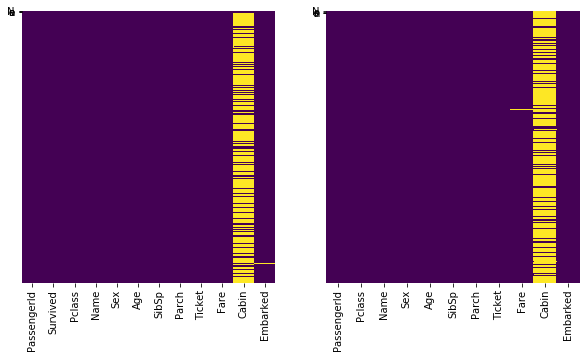

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(titanic_train.isnull(), yticklabels='None', cbar=False, cmap='viridis')

plt.subplot(1,2,2)
sns.heatmap(titanic_test.isnull(), yticklabels='None', cbar=False, cmap='viridis')

**We have filled in the missing age values in both the dataset. But we can see there are still lot of missing values in both the data.**    
**The 'Cabin' column has lot of missing data which is beyond filable so we will drop the 'Cabin' data, as well there are one or two entries in 'Embarked' and 'Fare' which we can drop as it won't affect our model.**

In [17]:
titanic_train.drop('Cabin', axis=1, inplace=True)
titanic_test.drop('Cabin', axis=1, inplace=True)

In [18]:
titanic_train.dropna(inplace=True)
titanic_test.dropna(inplace=True)

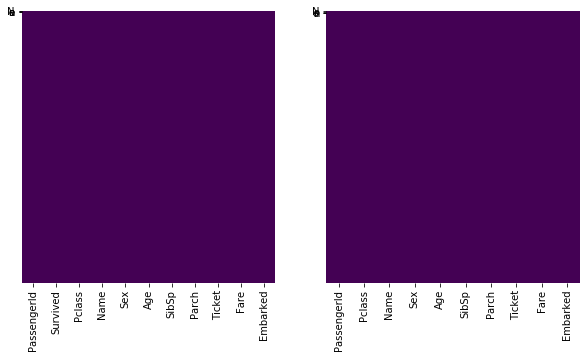

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(titanic_train.isnull(), yticklabels='None', cbar=False, cmap='viridis')

plt.subplot(1,2,2)
sns.heatmap(titanic_test.isnull(), yticklabels='None', cbar=False, cmap='viridis')

**Now we have got rid of all the missing values.**      

**Let's check of the DataFrame again**   
You can see the column 'PassengerId' is just the number alloted to the passengers and holds no value to the model to predict the outcome. So we can drop the 'PassengerId' column. Same with the 'Name' and 'Ticket' columns as well.   
We'll perform this on both the datasets as both of them holds the same.

In [20]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
titanic_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
titanic_test.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [22]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Now that we have dealt with the null values and unessential data we have to handle the categorical data**

It is important to convert text labels into something more understandable for the model.    
To do this with category based text data we can use one hot encoding so that our model could understand the values.

In [23]:
sex = pd.get_dummies(titanic_train['Sex'], drop_first=True)
embark = pd.get_dummies(titanic_train['Embarked'], drop_first=True)

In [24]:
titanic_train = pd.concat([titanic_train,sex,embark], axis=1)

In [25]:
titanic_train.drop(['Sex','Embarked'], axis=1, inplace=True)

In [26]:
titanic_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [27]:
sex1 = pd.get_dummies(titanic_test['Sex'], drop_first=True)
embark1 = pd.get_dummies(titanic_test['Embarked'], drop_first=True)

titanic_test = pd.concat([titanic_test,sex1,embark1], axis=1)

titanic_test.drop(['Sex','Embarked'], axis=1, inplace=True)

In [28]:
titanic_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


## Fitting the Model

**We are going to split the 'titanic_train' dataset into training and testing data itself. We'll be creating our model based on this data and evaluate our metrics of the model.   
The data will be splitted such that 70% will be training data and 30% will testing data.**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = titanic_train.drop(['Survived'], axis=1)
y = titanic_train['Survived']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logmodel = LogisticRegression(max_iter=1000)

In [34]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
pred = logmodel.predict(X_test)

## Evaluation

As we have predicted off of our model we can check the metrics and evaluate our model.

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [58]:
print(confusion_matrix(y_test,pred))

[[150  13]
 [ 32  72]]


**Our model's accuracy from the classification report is 83%. And the confusion matrix shows that we 150 True positives and   
72 True negatives.**

_______
## Implementation

Now that we have a model with 83% accuracy we can implement our model on 'titanic_test' dataset and predict the Survivals of the passengers.

In [39]:
survived = logmodel.predict(titanic_test)

In [40]:
survived

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [47]:
Survived = pd.DataFrame({'Survived': survived})
Survived.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [48]:
Survived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  417 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB


In [50]:
titanic_test2 = pd.read_csv('titanic_test.csv')

In [52]:
submission_file = pd.concat([titanic_test2, Survived], axis=1)

In [57]:
submission_file.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0


### We have successfully predicted the Survivals of the passengers and concatenated the findings with the initial dataset.